In [1]:
import scipy.stats as stats
import numpy as np
import pandas as pd

In [3]:
df= pd.read_csv('D:\\dsa\\Sales_add.csv')

In [4]:
df

,Month,Region,Manager,Sales_before_digital_add(in $),Sales_After_digital_add(in $)
0,Month-1,Region - A,Manager - A,132921,270390
1,Month-2,Region - A,Manager - C,149559,223334
2,Month-3,Region - B,Manager - A,146278,244243
3,Month-4,Region - B,Manager - B,152167,231808
4,Month-5,Region - C,Manager - B,159525,258402
5,Month-6,Region - A,Manager - B,137163,256948
6,Month-7,Region - C,Manager - C,130625,222106
7,Month-8,Region - A,Manager - A,131140,230637
8,Month-9,Region - B,Manager - C,171259,226261
9,Month-10,Region - C,Manager - B,141956,193735


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22 entries, 0 to 21
Data columns (total 5 columns):
 #   Column                          Non-Null Count  Dtype 
---  ------                          --------------  ----- 
 0   Month                           22 non-null     object
 1   Region                          22 non-null     object
 2   Manager                         22 non-null     object
 3   Sales_before_digital_add(in $)  22 non-null     int64 
 4   Sales_After_digital_add(in $)   22 non-null     int64 
dtypes: int64(2), object(3)
memory usage: 1008.0+ bytes


In [6]:
df.describe()

,Sales_before_digital_add(in $),Sales_After_digital_add(in $)
count,22.000000,22.000000
mean,149239.954545,231123.727273
std,14844.042921,25556.777061
min,130263.000000,187305.000000
25%,138087.750000,214960.750000
50%,147444.000000,229986.500000
75%,157627.500000,250909.000000
max,178939.000000,276279.000000


In [7]:
# The company wishes to clarify whether there is any increase in sales after stepping into digital marketing

In [8]:
# normality check

In [9]:
import matplotlib.pyplot as plt

<Figure size 432x288 with 0 Axes>

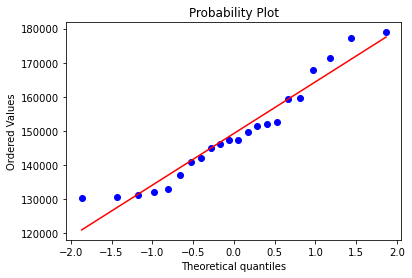

<Figure size 432x288 with 0 Axes>

In [10]:
stats.probplot(df['Sales_before_digital_add(in $)'],plot=plt)
plt.figure()

In [11]:
stats.shapiro(df['Sales_before_digital_add(in $)'])

ShapiroResult(statistic=0.9306764006614685, pvalue=0.12674309313297272)

<Figure size 432x288 with 0 Axes>

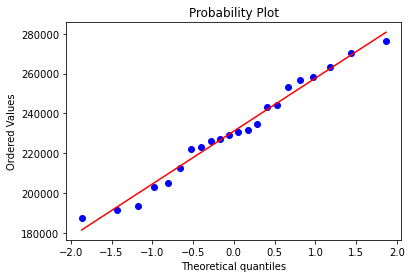

<Figure size 432x288 with 0 Axes>

In [12]:
stats.probplot(df['Sales_After_digital_add(in $)'],plot=plt)
plt.figure()

In [13]:
#  The distributions are normal 
 # sample size<30,sample observations are independent and unknown variance 

In [14]:
stat,p=stats.pearsonr(df['Sales_After_digital_add(in $)'],df['Sales_before_digital_add(in $)'])
if p>0.05:
    print('probabily independent')
else:
    print('probabily dependent')

probabily independent


In [15]:
v_t,v_p=stats.levene(df['Sales_After_digital_add(in $)'],df['Sales_before_digital_add(in $)'])
if v_p>0.05:
    print('variances are equal')
else:
    print('variances are not equal')

variances are not equal


In [16]:
# t test is suitable 
# null hypothesis :- There is no increase in sales after stepping into digital marketing
# altenate hypothesis   :- There is increase in sales after stepping into digital marketing
# alpha is 0.05

In [17]:
tval,pval=stats.ttest_ind(df['Sales_before_digital_add(in $)'],df['Sales_After_digital_add(in $)'],equal_var=False)
print('p value is',pval)
if pval<0.05:
    print('reject null hypothesis  ','That is there is increase in sales after stepping into digital marketing')
else:
    print('fail to reject null hypothesis  ','there is no increase in sales after stepping into digital marketing')

p value is 1.1019671619608604e-14
reject null hypothesis   That is there is increase in sales after stepping into digital marketing


In [19]:
# The company needs to check whether there is any dependency between the features “Region” and “Manager”

In [20]:
# chi square test is used 
# Null hypothesis   :-  that Region and Manager are independent that is there is no association or relationship between the
# Alternative hypothesis  :-   that Region and Manager are dependent


In [21]:
contingency_table=pd.crosstab(df['Region'],df['Manager'])
contingency_table

Manager,Manager - A,Manager - B,Manager - C
Region,,,
Region - A,4,3,3
Region - B,4,1,2
Region - C,1,3,1


In [22]:
s_chi,p_chi,dof,expected=stats.chi2_contingency(contingency_table)
print(' stat value=%.3f\n p value=%.3f\n degrees of freedom=%.3f'%(s_chi,p_chi,dof))
if p_chi>0.05:
    print('Independent categories that is there is no association or relationship between Region and Manager')
else:
    print('Dependent categories that is there is relationship between Region Nd Manager')

 stat value=3.051
 p value=0.549
 degrees of freedom=4.000
Independent categories that is there is no association or relationship between Region and Manager


In [23]:
#  by using critical value

In [24]:
alpha=0.05
critical_value=stats.chi2.ppf(1-alpha,df=dof)
print('critical value is',critical_value)

critical value is 9.487729036781154


In [25]:
if abs(stat)<critical_value:
    print('Independent categories that is there is no association or relationship between Region and Manager')
else:
    print('Dependent categories that is there is relationship between Region Nd Manager')

Independent categories that is there is no association or relationship between Region and Manager
